In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['MedHouseVal'] = data.target

# Display the first 5 rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
print(df.shape)

(20640, 9)


In [5]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [7]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

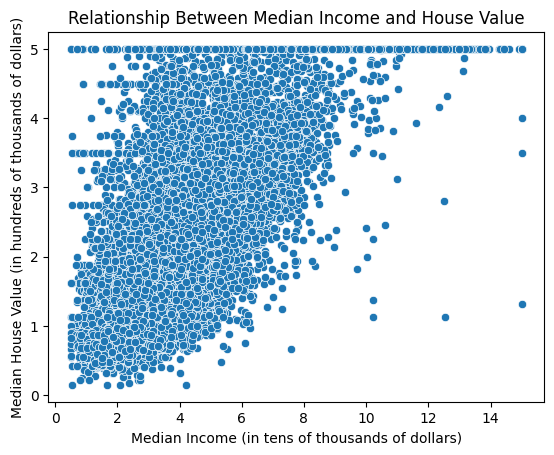

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of MedInc vs MedHouseVal
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.xlabel("Median Income (in tens of thousands of dollars)")
plt.ylabel("Median House Value (in hundreds of thousands of dollars)")
plt.title("Relationship Between Median Income and House Value")
plt.show()


<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

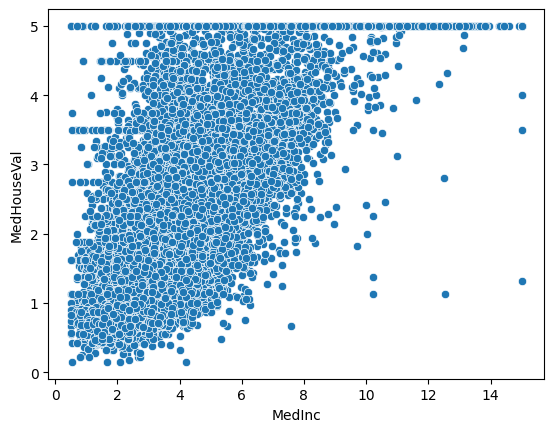

In [11]:
# Scatter plot of MedInc vs MedHouseVal
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])


Text(0.5, 0, 'Median Income (in tens of thousands of dollars)')

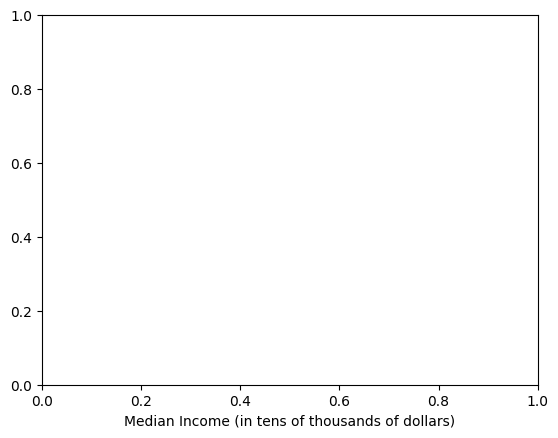

In [12]:
plt.xlabel("Median Income (in tens of thousands of dollars)")


Text(0, 0.5, 'Median House Value (in hundreds of thousands of dollars)')

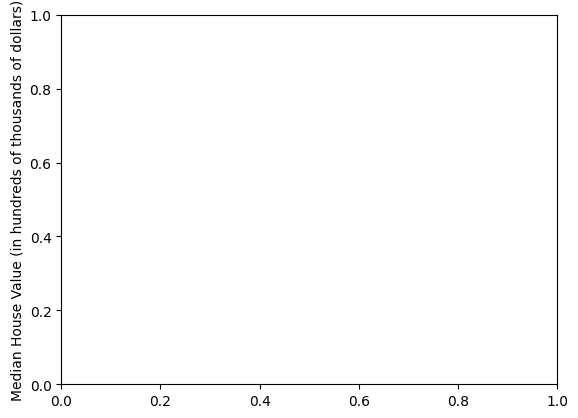

In [13]:
plt.ylabel("Median House Value (in hundreds of thousands of dollars)")


Text(0.5, 1.0, 'Relationship Between Median Income and House Value')

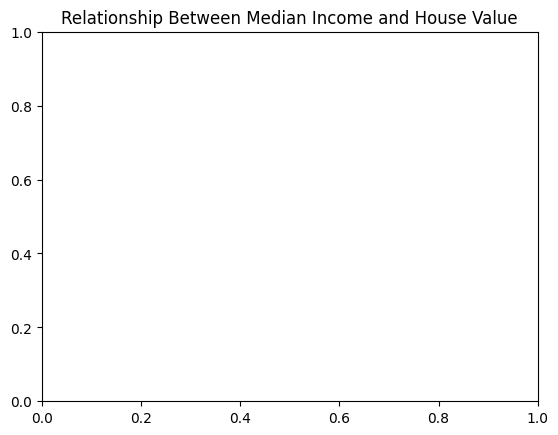

In [14]:
plt.title("Relationship Between Median Income and House Value")


In [16]:
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [18]:
# Define the predictor and target
X = df[['MedInc']]
y = df['MedHouseVal']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Define the predictor and target
X = df[['MedInc']]
y = df['MedHouseVal']


In [20]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Predict on the test set
y_pred = model.predict(X_test)


In [23]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.71
R² Score: 0.46


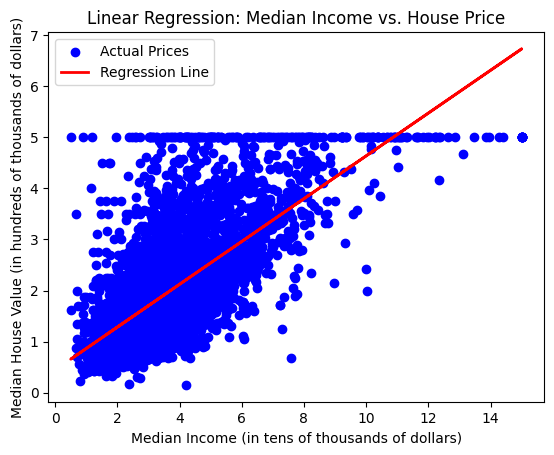

In [24]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Median Income (in tens of thousands of dollars)")
plt.ylabel("Median House Value (in hundreds of thousands of dollars)")
plt.title("Linear Regression: Median Income vs. House Price")
plt.legend()
plt.show()


In [25]:
# Ensure new_data has the correct feature name 'MedInc'
new_data = pd.DataFrame([[6]], columns=['MedInc'])

# Make the prediction
predicted_price = model.predict(new_data)

# Display the predicted price
print(f"Predicted House Price for a Median Income of $60,000: ${predicted_price[0] * 100_000:.2f}")


Predicted House Price for a Median Income of $60,000: $296062.83
